Firstly we import all of the packages, 
numpy and pandas for data handling,
tensorflow for actually building the CNN neural netwrok,
sci-kit learn for evaluation metrics,
matplotlib for visualizing what are CNN model is doing and 
category_encoder for implementing binary encoding for labels.

In [1]:
import numpy as np

import pandas as pd
import os

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer

We load the augmented mean-max pooled data files which have a fixed size of 20 rows and 25000 columns

In [2]:
def load_mfcc_files(directory):
    mfcc_data = []
    for file in os.listdir(directory):
            print(file)
            file_path = os.path.join(directory, file)
            data = pd.read_csv(file_path, header=None).values
            mfcc_data.append(data)
            print(data.shape)
    return mfcc_data

# Load MFCC data
asha = load_mfcc_files(r"D:\mahima files\short data aug\ab")            #path to augmented files generated
bhavgeet = load_mfcc_files(r"D:\mahima files\short data aug\bhav")
kishor = load_mfcc_files(r"D:\mahima files\short data aug\kk")
lavni = load_mfcc_files(r"D:\mahima files\short data aug\lavni")
michael = load_mfcc_files(r"D:\mahima files\short data aug\mj")
national = load_mfcc_files(r"D:\mahima files\short data aug\na")


print(f"Asha Bhosle: {len(asha)} files")
print(f"Bhavgeet: {len(bhavgeet)} files")
print(f"Kishor Kumar: {len(kishor)} files")
print(f"Lavni: {len(lavni)} files")
print(f"Michael Jackson: {len(michael)} files")
print(f"National Anthem: {len(national)} files")

aug_1_Aaiye Meharban - Howrah Bridge 1958 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Aaja Aaja - Yeh Raaste Hain Pyaar Ke 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Aao Huzoor Tumko - Kismet 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Aasmaa - Saand Ki Aankh 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Aise Jalta Hai Jiya - 1920 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Allahu - Dev 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Andhere - 31st October 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Ankh Milaoongi - Fiza 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Baila Baila - Khwahish 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Bhanwara Bada Nadan Asha Bhosle - Sahib Bibi Aur Ghulam 128 Kbps_MFCC.csv
(20, 25000)
aug_1_bollywood_MKS 1978 - O Saathi Re Tere Bina-Female_MFCC.csv
(20, 25000)
aug_1_bollywood_MS 1966 - Jhumka Gira Re_MFCC.csv
(20, 25000)
aug_1_bollywood_Rangeela 1995 - Tanha Tanha Yahan Pe_MFCC.csv
(20, 25000)
aug_1_bollywood_STK 1982 - Kitne Bhi Tu(Female)_MFCC.csv
(20, 25000)
aug_1_bollywood_UJ 1981 - Dil Cheez Kya Hai_MFCC.csv
(20, 25000)
aug_1_

Convert the loaded files into then numpy error and we explicitly mentioned the data type as float to ensure that there is no misinterpretation of data by numpy.

In [3]:
asha = np.array(asha,dtype='float32')
bhavgeet = np.array(bhavgeet,dtype='float32')
kishor=np.array(kishor,dtype='float32')
lavni=np.array(lavni,dtype='float32')
michael=np.array(michael,dtype='float32')
national=np.array(national,dtype='float32')

print(asha.shape)
print(bhavgeet.shape)
print(kishor.shape)
print(lavni.shape)
print(michael.shape)
print(national.shape)


(125, 20, 25000)
(125, 20, 25000)
(125, 20, 25000)
(125, 20, 25000)
(125, 20, 25000)
(125, 20, 25000)


Implemntation of Binary Encoding.

In [4]:
"""import numpy as np


# Example target variable with 6 different classes
target = ['asha', 'bhavgeet', 'kishor', 'lavni', 'michael', 'national']

# Create a sample target array
y = np.array(['asha', 'michael', 'lavni', 'kishor', 'national', 'bhavgeet', 'asha', 'lavni'])

# Initialize the LabelBinarizer
lb = LabelBinarizer()

# Fit and transform the target variable
y_binary = lb.fit_transform(y)

# Print the original target variable and the binary encoded target variable
print("Original target variable:", y)
print("Binary encoded target variable:\n", y_binary)

# Print the classes to verify the encoding
#print("Classes:", lb.classes_)"""

'import numpy as np\n\n\n# Example target variable with 6 different classes\ntarget = [\'asha\', \'bhavgeet\', \'kishor\', \'lavni\', \'michael\', \'national\']\n\n# Create a sample target array\ny = np.array([\'asha\', \'michael\', \'lavni\', \'kishor\', \'national\', \'bhavgeet\', \'asha\', \'lavni\'])\n\n# Initialize the LabelBinarizer\nlb = LabelBinarizer()\n\n# Fit and transform the target variable\ny_binary = lb.fit_transform(y)\n\n# Print the original target variable and the binary encoded target variable\nprint("Original target variable:", y)\nprint("Binary encoded target variable:\n", y_binary)\n\n# Print the classes to verify the encoding\n#print("Classes:",\xa0lb.classes_)'

In [5]:

# Combine data
data = np.concatenate((asha, bhavgeet, kishor, lavni, michael, national), axis=0)

# Create labels
labels = ['asha'] * len(asha) + ['bhavgeet'] * len(bhavgeet) + ['kishor'] * len(kishor) + ['lavni'] * len(lavni) + ['michael'] * len(michael) + ['national'] * len(national)

# Encode labels
lb = LabelBinarizer()

# Fit and transform the target variable
y_binary = lb.fit_transform(labels)
print(y_binary)



[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


In [6]:
"""# Combine data and labels into a single array
combined_data = np.empty((data.shape[0], data.shape[1], data.shape[2] + 1), dtype=object)
combined_data[:, :, :-1] = data
combined_data[:, 0, -1] = y_binary  # Add labels in the last column

# Check the shape of the combined data
print(f"Combined data shape: {combined_data.shape}")

# the last element in the innermost dimension contains the encoded labels."""

'# Combine data and labels into a single array\ncombined_data = np.empty((data.shape[0], data.shape[1], data.shape[2] + 1), dtype=object)\ncombined_data[:, :, :-1] = data\ncombined_data[:, 0, -1] = y_binary  # Add labels in the last column\n\n# Check the shape of the combined data\nprint(f"Combined data shape: {combined_data.shape}")\n\n# the last element in the innermost dimension contains the encoded labels.'

In [7]:
# Extract the data without the labels
X = data
# Extract the labels
y = y_binary

# Print the shapes of X and y to verify
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
X = X.astype(np.float32)
y = y.astype(np.int32)
print(y)


X shape: (750, 20, 25000)
y shape: (750, 6)
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


In [8]:
# Step 1: Split the dataset into training and test sets (80% training, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split the training set into training and validation sets (80% training, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(x_val[:1])
print(x_val[:1].shape)

(450, 20, 25000)
(150, 20, 25000)
(150, 20, 25000)
[[[-611.621 -611.621 -611.621 ...    0.       0.       0.   ]
  [   0.       0.       0.    ...    0.       0.       0.   ]
  [   0.       0.       0.    ...    0.       0.       0.   ]
  ...
  [   0.       0.       0.    ...    0.       0.       0.   ]
  [   0.       0.       0.    ...    0.       0.       0.   ]
  [   0.       0.       0.    ...    0.       0.       0.   ]]]
(1, 20, 25000)


In [9]:
"""
# Combine data and labels into a DataFrame
data = np.concatenate((asha, bhavgeet, kishor, lavni, michael, national), axis=0)
labels = ['asha'] * len(asha) + ['bhavgeet'] * len(bhavgeet) + ['kishor'] * len(kishor) + ['lavni'] * len(lavni) + ['michael'] * len(michael) + ['national'] * len(national)

# Create a DataFrame with data and labels
df = pd.DataFrame(data.reshape(data.shape[0], -1))  # Flatten data to 2D for DataFrame
df['label'] = labels

# Apply Binary Encoding to the 'label' column
encoder = BinaryEncoder()
y_encoded = encoder.fit_transform(df['label'])

# Separate original data (X) and encoded labels (y)
X = df.drop(columns=['label']).values.reshape(data.shape)  # Reshape to original data shape
y = y_encoded.values  # Encoded labels in binary format

# Split data into training, test, and validation sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# Verify shapes
print(f"x_train shape: {x_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"Sample of binary-encoded labels (y_train): {y_train[:5]}")"""

'\n# Combine data and labels into a DataFrame\ndata = np.concatenate((asha, bhavgeet, kishor, lavni, michael, national), axis=0)\nlabels = [\'asha\'] * len(asha) + [\'bhavgeet\'] * len(bhavgeet) + [\'kishor\'] * len(kishor) + [\'lavni\'] * len(lavni) + [\'michael\'] * len(michael) + [\'national\'] * len(national)\n\n# Create a DataFrame with data and labels\ndf = pd.DataFrame(data.reshape(data.shape[0], -1))  # Flatten data to 2D for DataFrame\ndf[\'label\'] = labels\n\n# Apply Binary Encoding to the \'label\' column\nencoder = BinaryEncoder()\ny_encoded = encoder.fit_transform(df[\'label\'])\n\n# Separate original data (X) and encoded labels (y)\nX = df.drop(columns=[\'label\']).values.reshape(data.shape)  # Reshape to original data shape\ny = y_encoded.values  # Encoded labels in binary format\n\n# Split data into training, test, and validation sets\nx_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\nx_train, x_val, y_train, y_val = train_test_

In [11]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models, callbacks
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split



# Build the CNN model for feature extraction
def build_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv1D(32, 8, activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(2, padding='same'))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv1D(64, 5, activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(2, padding='same'))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv1D(128, 5, activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(2, padding='same'))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(6, activation='softmax'))  # Assuming 6 classes for classification
    return model

input_shape = (20, 25000)  # Adjusted to match the input data shape
cnn_model = build_cnn_model(input_shape)

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the data to match the input shape of the model
x_train = x_train.reshape(-1, 20, 25000)
x_val = x_val.reshape(-1, 20, 25000)
x_test = x_test.reshape(-1, 20, 25000)

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train the CNN model with early stopping
cnn_model.fit(x_train, y_train, epochs=200, batch_size=16, validation_data=(x_val, y_val), callbacks=[early_stopping, lr_scheduler])

# Assuming X_test and y_test are your test data and labels
X_test = x_test.astype(np.float32)
y_test = y_test.astype(np.int32)  # Ensure y_test is integer type for categorical_crossentropy

# Evaluate the model on the test data
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, batch_size=32)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy}")
cnn_model.summary()

# Predict the labels for the test set
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels if necessary




Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 212ms/step - accuracy: 0.2540 - loss: 2.6508 - val_accuracy: 0.1400 - val_loss: 2.8554 - learning_rate: 0.0010
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.3806 - loss: 2.0885 - val_accuracy: 0.1600 - val_loss: 2.7750 - learning_rate: 0.0010
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.3818 - loss: 1.9993 - val_accuracy: 0.2067 - val_loss: 2.0731 - learning_rate: 0.0010
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.4137 - loss: 1.8416 - val_accuracy: 0.2600 - val_loss: 1.9781 - learning_rate: 0.0010
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.4268 - loss: 1.6954 - val_accuracy: 0.3600 - val_loss: 1.6113 - learning_rate: 0.0010
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - accuracy: 0.4307 - loss: 1.6245 - val_accuracy: 0.4933 - val_loss: 1.2465 - learning_rate: 0.0010
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.4491 - loss: 1.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 20, 32)         │     6,400,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 20, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 10, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 10, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 5, 128)         │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 5, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,507,252 (74.41 MB)

 Trainable params: 6,502,182 (24.80 MB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 13,004,366 (49.61 MB)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [12]:
# Ensure y_test is in the correct format (integer labels for multiclass)
y_test_classes = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

# Now calculate the metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Print detailed classification report
print(classification_report(y_test_classes, y_pred_classes))


Accuracy: 0.8333333333333334
Precision: 0.8471357167848396
Recall: 0.8333333333333334
F1 Score: 0.8338879953144925
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.91      0.91      0.91        22
           2       0.86      0.83      0.84        29
           3       0.84      0.62      0.71        26
           4       0.58      0.83      0.68        18
           5       0.93      1.00      0.96        25

    accuracy                           0.83       150
   macro avg       0.83      0.84      0.83       150
weighted avg       0.85      0.83      0.83       150



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Visualizing filters for layer: conv1d_3


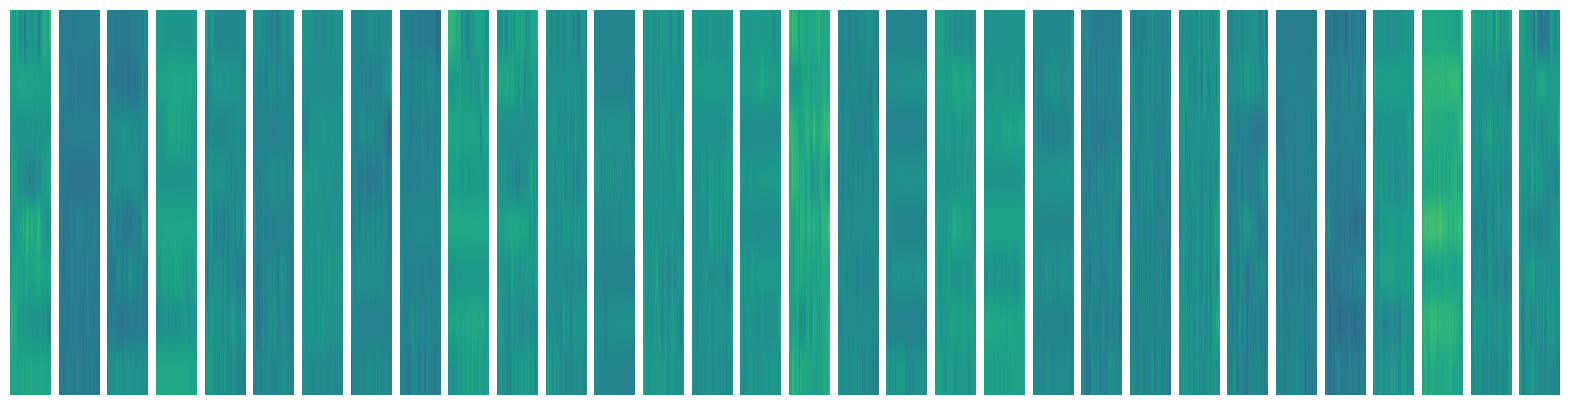

Visualizing filters for layer: conv1d_4


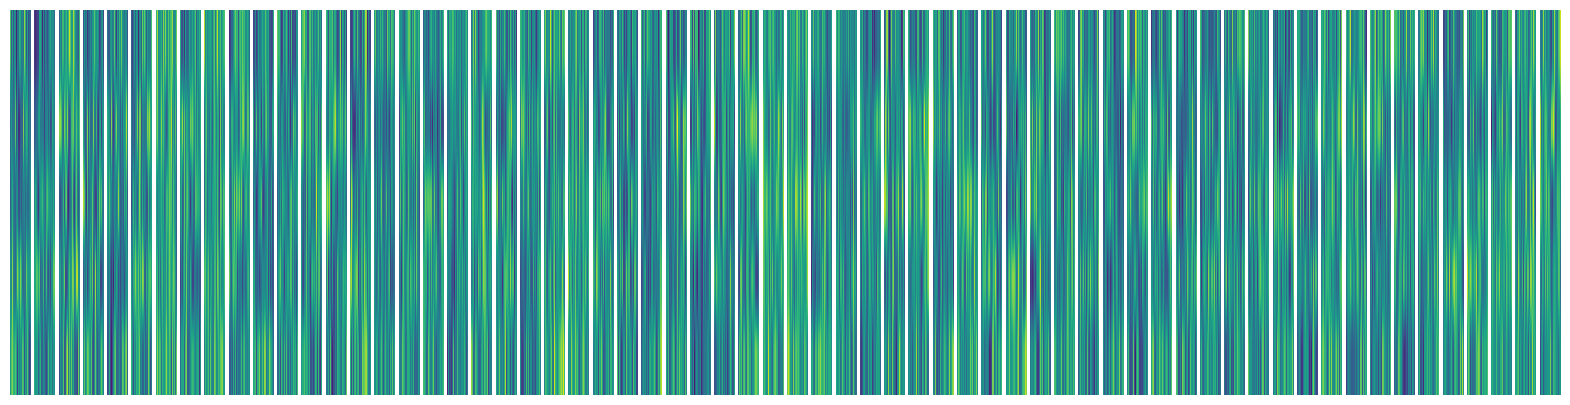

Visualizing filters for layer: conv1d_5


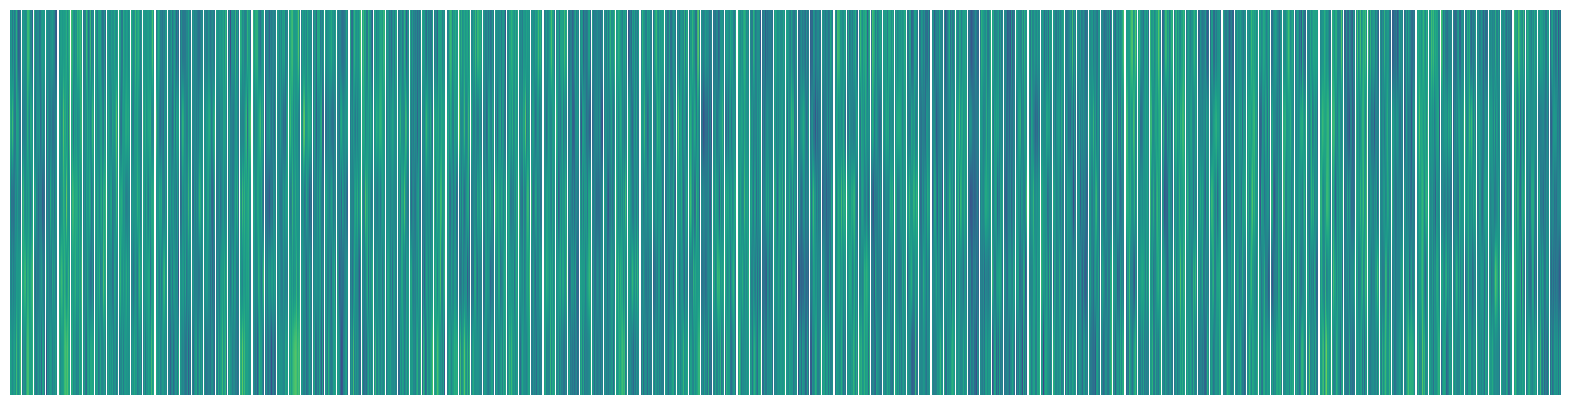

In [13]:

x_train = np.random.rand(10, 20, 25000).astype(np.float32)  # Dummy data for demonstration
cnn_model.predict(x_train[:1])

def visualize_filters(model, layer_name):
    """
    Visualize the filters of a convolutional layer.
    
    Parameters:
    model (tensorflow.keras.Model): The trained model.
    layer_name (str): The name of the convolutional layer.
    """
    layer = model.get_layer(name=layer_name)
    filters, biases = layer.get_weights()
    
    # Normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    
    n_filters = filters.shape[-1]
    fig, axes = plt.subplots(1, n_filters, figsize=(20, 5))
    
    for i in range(n_filters):
        f = filters[:, :, i]
        axes[i].imshow(f, aspect='auto', cmap='viridis')
        axes[i].axis('off')
    
    plt.show()

# Get the names of the convolutional layers
conv_layer_names = [layer.name for layer in cnn_model.layers if isinstance(layer, tf.keras.layers.Conv1D)]

# Visualize the filters for each convolutional layer
for layer_name in conv_layer_names:
    print(f"Visualizing filters for layer: {layer_name}")
    visualize_filters(cnn_model, layer_name)

In [16]:
def load_mfcc_files(directory):
    mfcc_data = []
    files=[]
    for file in os.listdir(directory):
            print(file)
            file_path = os.path.join(directory, file)
            data = pd.read_csv(file_path, header=None).values
            mfcc_data.append(data)
            files.append(file)
            print(data.shape)
    return mfcc_data,files
test_data,file_names = load_mfcc_files(r'C:\Users\Dnyaneshwari\Desktop\DS FINAL\csv_new_resize\csv_new_resize')
test_data = np.array(test_data,dtype='float32')
print(test_data.shape)

01-MFCC.csv
(20, 25000)
02-MFCC.csv
(20, 25000)
03-MFCC.csv
(20, 25000)
04-MFCC.csv
(20, 25000)
05-MFCC.csv
(20, 25000)
06-MFCC.csv
(20, 25000)
07-MFCC.csv
(20, 25000)
08-MFCC.csv
(20, 25000)
09-MFCC.csv
(20, 25000)
10-MFCC.csv
(20, 25000)
100-MFCC.csv
(20, 25000)
101-MFCC.csv
(20, 25000)
102-MFCC.csv
(20, 25000)
103-MFCC.csv
(20, 25000)
104-MFCC.csv
(20, 25000)
105-MFCC.csv
(20, 25000)
106-MFCC.csv
(20, 25000)
107-MFCC.csv
(20, 25000)
108-MFCC.csv
(20, 25000)
109-MFCC.csv
(20, 25000)
11-MFCC.csv
(20, 25000)
110-MFCC.csv
(20, 25000)
111-MFCC.csv
(20, 25000)
112-MFCC.csv
(20, 25000)
113-MFCC.csv
(20, 25000)
114-MFCC.csv
(20, 25000)
115-MFCC.csv
(20, 25000)
116-MFCC.csv
(20, 25000)
12-MFCC.csv
(20, 25000)
13-MFCC.csv
(20, 25000)
14-MFCC.csv
(20, 25000)
15-MFCC.csv
(20, 25000)
16-MFCC.csv
(20, 25000)
17-MFCC.csv
(20, 25000)
18-MFCC.csv
(20, 25000)
19-MFCC.csv
(20, 25000)
20-MFCC.csv
(20, 25000)
21-MFCC.csv
(20, 25000)
22-MFCC.csv
(20, 25000)
23-MFCC.csv
(20, 25000)
24-MFCC.csv
(20, 25000)

In [17]:
prediction = cnn_model.predict(test_data) 
print(prediction)
print(prediction.shape)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[3.08993971e-04 8.08599312e-03 1.51184862e-02 2.61894835e-04
  1.21034659e-03 9.75014329e-01]
 [2.74390593e-04 1.63868317e-04 7.09650194e-05 1.01416977e-03
  2.33337807e-04 9.98243332e-01]
 [8.90117958e-02 3.96943465e-03 7.18636019e-03 5.60537040e-01
  3.33658934e-01 5.63643686e-03]
 [1.02340207e-01 7.84298591e-03 1.84308924e-03 7.86710739e-01
  9.95219648e-02 1.74104318e-03]
 [3.10003670e-04 6.01361133e-02 9.37497437e-01 1.63139994e-04
  7.67875754e-04 1.12536491e-03]
 [9.69310820e-01 3.76607548e-03 4.23053186e-03 1.04581490e-02
  1.19517958e-02 2.82622292e-04]
 [3.38197425e-02 4.60623443e-01 4.46129978e-01 3.65186408e-02
  8.34132917e-03 1.45668415e-02]
 [2.15043902e-01 1.18727633e-03 1.70392613e-03 4.84374553e-01
  2.93793887e-01 3.89635516e-03]
 [6.77542703e-04 8.20340887e-02 9.13986385e-01 3.16595775e-04
  2.10505212e-03 8.80281499e-04]
 [9.71191943e-01 1.19910238e-03 2.92750751e-03 4.82843257e-03
  1.97481215e-02 1.04926781e-04]
 [3.89649835

In [18]:
converted_predictions = np.where(prediction > 0.5, 1, 0)
print(converted_predictions)

[[0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 1 0 0 0 0]
 [0 0 1 0 

In [19]:
decoded_labels = lb.inverse_transform(converted_predictions)


np.set_printoptions(threshold=np.inf, linewidth=np.inf) # This ensures no truncation

decoded_labels=np.array(decoded_labels)

# Print the entire array
print(decoded_labels )


['national' 'national' 'lavni' 'lavni' 'kishor' 'asha' 'asha' 'asha' 'kishor' 'asha' 'kishor' 'kishor' 'bhavgeet' 'michael' 'kishor' 'bhavgeet' 'bhavgeet' 'national' 'national' 'kishor' 'asha' 'lavni' 'bhavgeet' 'asha' 'asha' 'michael' 'lavni' 'national' 'asha' 'asha' 'asha' 'asha' 'national' 'national' 'kishor' 'asha' 'michael' 'michael' 'kishor' 'asha' 'asha' 'bhavgeet' 'bhavgeet' 'national' 'kishor' 'kishor' 'asha' 'national' 'michael' 'lavni' 'asha' 'national' 'michael' 'kishor' 'bhavgeet' 'lavni' 'lavni' 'lavni' 'bhavgeet' 'asha' 'asha' 'asha' 'kishor' 'lavni' 'michael' 'bhavgeet' 'kishor' 'kishor' 'asha' 'michael' 'kishor' 'kishor' 'asha' 'kishor' 'kishor' 'kishor' 'asha' 'national' 'lavni' 'kishor' 'asha' 'kishor' 'national' 'national' 'kishor' 'asha' 'bhavgeet' 'kishor' 'lavni' 'lavni' 'asha' 'national' 'kishor' 'lavni' 'michael' 'lavni' 'kishor' 'national' 'kishor' 'kishor' 'kishor' 'lavni' 'michael' 'national' 'asha' 'kishor' 'national' 'lavni' 'kishor' 'kishor' 'bhavgeet' 'n

In [20]:
final=np.array(file_names)
final_predictions = np.column_stack((final, decoded_labels))
print(final_predictions)
np.savetxt('predictions1.csv', final_predictions, delimiter=',', fmt='%s', header='File_Name,Category', comments='')

[['01-MFCC.csv' 'national']
 ['02-MFCC.csv' 'national']
 ['03-MFCC.csv' 'lavni']
 ['04-MFCC.csv' 'lavni']
 ['05-MFCC.csv' 'kishor']
 ['06-MFCC.csv' 'asha']
 ['07-MFCC.csv' 'asha']
 ['08-MFCC.csv' 'asha']
 ['09-MFCC.csv' 'kishor']
 ['10-MFCC.csv' 'asha']
 ['100-MFCC.csv' 'kishor']
 ['101-MFCC.csv' 'kishor']
 ['102-MFCC.csv' 'bhavgeet']
 ['103-MFCC.csv' 'michael']
 ['104-MFCC.csv' 'kishor']
 ['105-MFCC.csv' 'bhavgeet']
 ['106-MFCC.csv' 'bhavgeet']
 ['107-MFCC.csv' 'national']
 ['108-MFCC.csv' 'national']
 ['109-MFCC.csv' 'kishor']
 ['11-MFCC.csv' 'asha']
 ['110-MFCC.csv' 'lavni']
 ['111-MFCC.csv' 'bhavgeet']
 ['112-MFCC.csv' 'asha']
 ['113-MFCC.csv' 'asha']
 ['114-MFCC.csv' 'michael']
 ['115-MFCC.csv' 'lavni']
 ['116-MFCC.csv' 'national']
 ['12-MFCC.csv' 'asha']
 ['13-MFCC.csv' 'asha']
 ['14-MFCC.csv' 'asha']
 ['15-MFCC.csv' 'asha']
 ['16-MFCC.csv' 'national']
 ['17-MFCC.csv' 'national']
 ['18-MFCC.csv' 'kishor']
 ['19-MFCC.csv' 'asha']
 ['20-MFCC.csv' 'michael']
 ['21-MFCC.csv' 'michael

In [18]:
# test_data = load_mfcc_files(r'C:\Users\Dnyaneshwari\Desktop\DS FINAL\csv_new_resize\csv_new_resize')
# prediction = models.predict(test_data) 
# print(prediction)
'''
import os
import numpy as np
from tensorflow.keras.models import load_model

# Path to the folder containing MFCC files
mfcc_folder_path = r'C:\Users\Dnyaneshwari\Desktop\DS FINAL\csv_new_resize\csv_new_resize'

# Load your trained model
  # Replace with the actual path to your saved model
model = load_model(cnn_model)

# Helper function to load and preprocess each MFCC file
def load_and_preprocess_mfcc(file_path, target_shape):
    # Load MFCC data (assuming numpy format, adjust if different format)
    mfcc_data = np.load(file_path)  # Use np.load() if .npy files, use pd.read_csv() for .csv files
    # Check if resizing is needed
    if mfcc_data.shape != target_shape:
        # Resize or pad the data to fit the target shape
        mfcc_data = np.resize(mfcc_data, target_shape)
    # Normalize data if needed (e.g., scaling between 0 and 1)
    mfcc_data = mfcc_data / np.max(np.abs(mfcc_data))
    return mfcc_data

# Define the expected input shape for the model
# Update target_shape based on your model's input dimensions
target_shape = (20, 25000)  # Replace n_mfcc and time_steps with your model's expected dimensions

# Prepare data for prediction
mfcc_data_list = []
file_names = []
for file_name in os.listdir(mfcc_folder_path):
    if file_name.endswith('.npy'):  # Assuming MFCC files are saved as .npy, change if using .csv
        file_path = os.path.join(mfcc_folder_path, file_name)
        mfcc_data = load_and_preprocess_mfcc(file_path, target_shape)
        mfcc_data_list.append(mfcc_data)
        file_names.append(file_name)

# Convert the list to a numpy array with the correct shape for model input
mfcc_data_array = np.array(mfcc_data_list)
# Reshape to add an additional dimension if your model expects it (e.g., for channels)
mfcc_data_array = mfcc_data_array.reshape(mfcc_data_array.shape[0], *target_shape, 1)  # Add 1 for the channels dimension (if needed)

# Make predictions
predictions = model.predict(mfcc_data_array)

# Display predictions
for i, prediction in enumerate(predictions):
    print(f"File: {file_names[i]} - Prediction: {prediction}")
'''



SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 144-145: truncated \UXXXXXXXX escape (986066997.py, line 4)